# Downside

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd

from stark.data import hedge_fund_index_returns

In [2]:
data = hedge_fund_index_returns()
data.head()

/Users/arturopolancolozano/Documents/GitHub/Investment-Management-with-Python-and-Machine-Learning/Introduction to Portfolio Construction and Analysis with Python/Week 1/stark/data.py:30: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  hf_index_returns = pd.read_csv(


,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


# Semidiviation

In [3]:
data.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [4]:
mask = data < 0
data[mask].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [5]:
from stark.metrics import semi_deviation

semi_deviation(data)

/Users/arturopolancolozano/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR & CVaR

Value at Risk
- Historic VaR
- Parametrics VaR - Gaussian VaR
- Modified Cornish-Fisher VaR 

In [7]:
np.percentile(a=data, q=5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [9]:
from stark.metrics import var_historic

var_historic(data)


Convertible Arbitrage     0.01576
CTA Global                0.03169
Distressed Securities     0.01966
Emerging Markets          0.04247
Equity Market Neutral     0.00814
Event Driven              0.02535
Fixed Income Arbitrage    0.00787
Global Macro              0.01499
Long/Short Equity         0.02598
Merger Arbitrage          0.01047
Relative Value            0.01174
Short Selling             0.06783
Funds Of Funds            0.02047
dtype: float64

In [10]:
import scipy.stats

In [13]:
# percent point function
z_score = scipy.stats.norm.ppf(0.05)
z_score


-1.6448536269514729

In [14]:
data.std(ddof=0).multiply(z_score).add(data.mean())

Convertible Arbitrage    -0.021691
CTA Global               -0.034235
Distressed Securities    -0.021032
Emerging Markets         -0.047164
Equity Market Neutral    -0.008850
Event Driven             -0.021144
Fixed Income Arbitrage   -0.014579
Global Macro             -0.018766
Long/Short Equity        -0.026397
Merger Arbitrage         -0.010435
Relative Value           -0.013061
Short Selling            -0.080086
Funds Of Funds           -0.021292
dtype: float64

In [16]:
from stark.metrics import var_gaussian

var_gaussian(data)

Convertible Arbitrage     0.021691
CTA Global                0.034235
Distressed Securities     0.021032
Emerging Markets          0.047164
Equity Market Neutral     0.008850
Event Driven              0.021144
Fixed Income Arbitrage    0.014579
Global Macro              0.018766
Long/Short Equity         0.026397
Merger Arbitrage          0.010435
Relative Value            0.013061
Short Selling             0.080086
Funds Of Funds            0.021292
dtype: float64

In [17]:
var_gaussian(data, modified=True)

Convertible Arbitrage     0.025166
CTA Global                0.033094
Distressed Securities     0.025102
Emerging Markets          0.053011
Equity Market Neutral     0.010734
Event Driven              0.025516
Fixed Income Arbitrage    0.017881
Global Macro              0.013581
Long/Short Equity         0.027935
Merger Arbitrage          0.012612
Relative Value            0.016157
Short Selling             0.066157
Funds Of Funds            0.021576
dtype: float64

<Axes: title={'center': 'EDHEC Hedge Fund Indices: VaR'}>

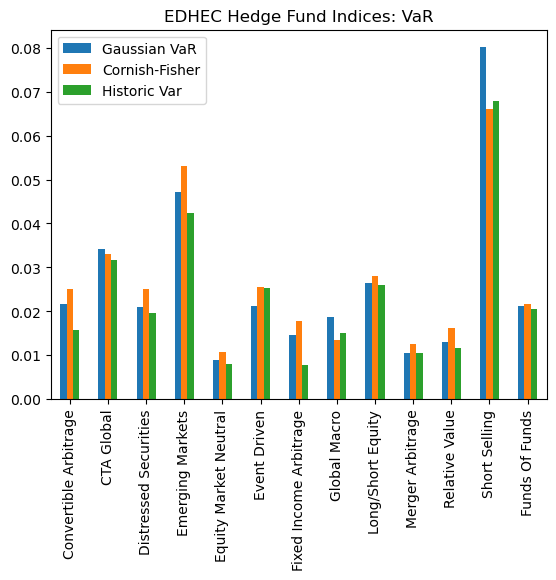

In [20]:
var_estimations_list = [
    var_gaussian(data), 
    var_gaussian(data, modified=True), 
    var_historic(data)
]

var_comparisson = pd.concat(var_estimations_list, axis=1)
var_comparisson.columns = ["Gaussian VaR", "Cornish-Fisher", "Historic Var"]
var_comparisson.plot.bar(title="EDHEC Hedge Fund Indices: VaR")

# Beyond VaR - CVaR

In [21]:
from stark.metrics import cvar_historic

cvar_historic(data)

Convertible Arbitrage     0.036550
CTA Global                0.041264
Distressed Securities     0.036429
Emerging Markets          0.072364
Equity Market Neutral     0.016879
Event Driven              0.038336
Fixed Income Arbitrage    0.028257
Global Macro              0.020629
Long/Short Equity         0.041943
Merger Arbitrage          0.019143
Relative Value            0.024650
Short Selling             0.096821
Funds Of Funds            0.033207
dtype: float64